Using:
    https://gist.github.com/EdwardJRoss/86b31848a7951411de56f10f55e9de4e
    https://forums.fast.ai/t/character-level-language-model/31379
    
Lesson 3 RNN


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [6]:
# bs=48
# bs=24
bs=192

In [4]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [92]:
df = pd.read_csv('/home/trpb2/data/takeaway/raw_just_eat.csv')

In [93]:
df['text'] = df.text.str.lower()

In [94]:
df[df.text.str.contains('asda kitchen', regex= True, na=False)]

,label,text
25734,Pizza,asda kitchen - cape hill
25813,Pizza,asda kitchen - wakefield
26301,Pizza,asda kitchen - hull mount pleasant
26463,Pizza,asda kitchen - toryglen
26609,Pizza,asda kitchen - barking
27042,Pizza,asda kitchen - ashton
27185,Pizza,asda kitchen - canterbury
27283,Pizza,asda kitchen - blackpool
27413,Pizza,asda kitchen - govan
27875,Pizza,asda kitchen - livingston


In [95]:
#chains to drop and replace

to_drop = df[df.text.str.contains('asda kitchen', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "asda kitchen"} , ignore_index=True)

to_drop = df[df.text.str.contains('basilico', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "basilico"} , ignore_index=True)

to_drop = df[df.text.str.contains('bella italia', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "bella italia"} , ignore_index=True)

to_drop = df[df.text.str.contains('birdbox', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Chicken' , 'text' : "birdbox"} , ignore_index=True)

to_drop = df[df.text.str.contains('blazing bird', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Chicken' , 'text' : "blazing bird"} , ignore_index=True)

to_drop = df[df.text.str.contains('burger king', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "burger king"} , ignore_index=True)

to_drop = df[df.text.str.contains('caspian pizza', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "caspian pizza"} , ignore_index=True)

to_drop = df[df.text.str.contains('chiquito', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "chiquito"} , ignore_index=True)

to_drop = df[df.text.str.contains('firezza', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "firezza"} , ignore_index=True)

to_drop = df[df.text.str.contains("frankie & benny's", regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "frankie & benny's"} , ignore_index=True)

to_drop = df[df.text.str.contains('gbk', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "gourmet burger kitchen (gbk)"} , ignore_index=True)

to_drop = df[df.text.str.contains('greggs', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Sandwich / Coffee Shops / Bakery' , 'text' : "greggs"} , ignore_index=True)

to_drop = df[df.text.str.contains('harvester', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "harvester"} , ignore_index=True)

to_drop = df[df.text.str.contains('itsu', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "itsu"} , ignore_index=True)

to_drop = df[df.text.str.contains('kfc', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Chicken' , 'text' : "kfc"} , ignore_index=True)

to_drop = df[df.text.str.contains('kick ass', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "kick ass burrito"} , ignore_index=True)

to_drop = df[df.text.str.contains('las iguanas', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "las iguanas"} , ignore_index=True)

to_drop = df[df.text.str.contains('papa john', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "papa john's"} , ignore_index=True)

to_drop = df[df.text.str.contains('pizza hut', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "pizza hut"} , ignore_index=True)

to_drop = df[df.text.str.contains('stack & grill', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "stack & grill by cafe rouge"} , ignore_index=True)

to_drop = df[df.text.str.contains('subway', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Sandwich / Coffee Shops / Bakery' , 'text' : "subway"} , ignore_index=True)

to_drop = df[df.text.str.contains('tim horton', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Sandwich / Coffee Shops / Bakery' , 'text' : "tim horton"} , ignore_index=True)

to_drop = df[df.text.str.contains('toby carvery', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "toby carvery"} , ignore_index=True)

to_drop = df[df.text.str.contains('tortilla -', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "tortilla"} , ignore_index=True)

to_drop = df[df.text.str.contains('turtle bay', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Caribbean' , 'text' : "turtle bay"} , ignore_index=True)

to_drop = df[df.text.str.contains('wimpy', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "wimpy"} , ignore_index=True)

to_drop = df[df.text.str.contains('yo!', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "yo! sushi"} , ignore_index=True)


## Character Set

What letters outside of ASCII are in the names?


In [96]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.text))) if _ not in string.ascii_letters)
foreign_chars.most_common()


[(' ', 78960),
 ("'", 57418),
 (',', 30074),
 ('"', 5668),
 ('&', 2781),
 ('-', 1306),
 ('(', 305),
 (')', 305),
 ('’', 270),
 ('2', 240),
 ('1', 222),
 ('.', 220),
 ('@', 204),
 ('4', 122),
 ('0', 114),
 ('3', 83),
 ('8', 74),
 ('9', 61),
 ('7', 55),
 ('6', 52),
 ('5', 52),
 ('é', 31),
 ('`', 26),
 ('!', 24),
 ('´', 19),
 ('/', 14),
 ('+', 7),
 ('‘', 7),
 ('#', 7),
 ('?', 4),
 ('ê', 4),
 ('–', 4),
 (':', 4),
 ('°', 3),
 ('*', 3),
 ('ó', 2),
 ('è', 2),
 ('ö', 2),
 ('%', 2),
 ('[', 1),
 ('á', 1),
 ('ü', 1),
 ('®', 1),
 ('\\', 1),
 ('~', 1),
 ('ä', 1),
 (']', 1)]

In [97]:
df['ascii_name'] = df.text.apply(lambda x: unidecode(str(x)))
df[df.text != df.ascii_name]

,label,text,ascii_name
57,African,izatu’s kitchen,izatu's kitchen
108,African,ruby’s bar and cuisine,ruby's bar and cuisine
146,African,afromumii @ lovelygloworm café,afromumii @ lovelygloworm cafe
179,Chicken,friendly phil’s chatham,friendly phil's chatham
189,Chicken,lesley’s hot wings,lesley's hot wings
308,Chicken,hot ´n´ tender l1,hot 'n' tender l1
323,Chicken,auntie anne’s,auntie anne's
366,Chicken,harlie’s,harlie's
397,Chicken,roxy’s bistro bar,roxy's bistro bar
426,Chicken,raindell’s,raindell's


In [98]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.ascii_name))) if _ not in string.ascii_letters)
foreign_chars.most_common()

[(' ', 78960),
 ("'", 57148),
 (',', 30074),
 ('"', 6234),
 ('&', 2781),
 ('-', 1310),
 ('(', 306),
 (')', 306),
 ('2', 240),
 ('1', 222),
 ('.', 220),
 ('@', 204),
 ('4', 122),
 ('0', 114),
 ('3', 83),
 ('8', 74),
 ('9', 61),
 ('7', 55),
 ('6', 52),
 ('5', 52),
 ('`', 26),
 ('!', 24),
 ('/', 14),
 ('+', 7),
 ('#', 7),
 ('?', 4),
 (':', 4),
 ('*', 3),
 ('%', 2),
 ('[', 1),
 ('\\', 1),
 ('~', 1),
 (']', 1)]

In [99]:
df['ascii_name_fix'] = df.ascii_name.str.replace('`',"'")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('~'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(']'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('['," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('\\'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('%'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('*'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(':'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('+'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('/'," ")
suss_chars = ['`',']','%']
df[df.ascii_name_fix.str.contains('|'.join(suss_chars))]

,label,text,ascii_name,ascii_name_fix


## Check for duplicates


In [100]:
name_classes = df.\
  groupby('ascii_name_fix').\
  nunique().label.sort_values(ascending=False)
name_classes.head(50)

ascii_name_fix
tasty bites              7
munchies                 5
flames                   5
yum yum                  5
bbq hut                  4
mamma mia                4
hot spot                 4
yummies                  4
kebabish original        4
fusion                   4
spicy grill              4
perfect fried chicken    4
marmaris                 4
the grill house          4
charcoal grill           4
ali baba                 4
flavours                 4
top taste                4
sizzler                  4
real taste               4
grill house              4
royal grill              3
afc                      3
chicken hut              3
spicy bite               3
burger plus              3
milano                   3
seven stars              3
best kebab               3
the grill                3
mr kebab                 3
chicken express          3
pizza milano             3
the hot hut              3
grill                    3
posh nosh                3
la dolce vita

In [101]:
df_dupe = df[df.ascii_name_fix.isin(name_classes[name_classes > 1].index)]
df_dupe = df_dupe[['label','ascii_name_fix']]
piv = df_dupe.pivot_table(index = 'ascii_name_fix', values='label', columns = 'label', aggfunc=len, fill_value = 0)

In [102]:
piv.to_csv('dupes.csv', sep=',')

In [103]:
df_dupe

,label,ascii_name_fix
4,Other,ariana restaurant
19,Other,ariana restaurant
70,African,cafe spice
148,Chicken,smokeys
164,Pizza,flames
177,Kebab,spice land
191,Chicken,bbq express
201,Pizza,griller
221,Chicken,peri peri original
225,Pizza,bar-b-q house


just remove all the duplicated names

In [104]:
df = df[~df.ascii_name_fix.isin(name_classes[name_classes > 1].index)]

check for duplicate name label combinations

In [105]:
counts = df.assign(n=1).groupby(['ascii_name_fix', 'label']).count().sort_values('n', ascending=False)
counts.head(n=20)

,,text,ascii_name,n
ascii_name_fix,label,,,
pepe's piri piri,Chicken,44,44,44
dixy chicken,Chicken,43,43,43
china garden,Chinese,35,35,35
tops pizza,Pizza,32,32,32
taste of india,Indian,31,31,31
bengal spice,Indian,26,26,26
pizza king,Pizza,25,25,25
chicken cottage,Chicken,25,25,25
lucky star,Chinese,25,25,25


In [106]:
df = df.drop_duplicates(['ascii_name_fix', 'label'])


### Distribution by Language

The dataset is very unbalanced.


In [107]:
df.groupby('label').ascii_name_fix.count().sort_values(ascending=False)

label
Indian                              5426
Pizza                               4604
Other                               4361
Chinese                             2621
Kebab                               1963
Chicken                             1762
Fish & Chips                        1750
Caribbean                            435
Sandwich / Coffee Shops / Bakery     295
African                              138
Name: ascii_name_fix, dtype: int64


## Create Validation and Training Sets

We want our final model to work well on any language.

But if we pick our validation set uniformly at random from the data we're likely to get many Indian and not many African, which isn't a good test of this.

So instead we'll take our validation set from an equal number from each subclass.


In [108]:
df = df.reset_index().drop('index', 1)

In [109]:
counts = df.groupby('label').ascii_name_fix.count().sort_values(ascending=False)
counts

label
Indian                              5426
Pizza                               4604
Other                               4361
Chinese                             2621
Kebab                               1963
Chicken                             1762
Fish & Chips                        1750
Caribbean                            435
Sandwich / Coffee Shops / Bakery     295
African                              138
Name: ascii_name_fix, dtype: int64

In [110]:
valid_size = 70 # We'll pick 30 at random from each subclass
train_size = 1000 # For a balanced training set we'll pick 500 at random with replacement

In [111]:
np.random.seed(6011)
valid_idx = []
for label in counts.keys():
    # Random sample of size "valid_size" for each class
    valid_idx += list(df[df.label == label].sample(valid_size).index)

In [112]:
df['valid'] = False
df.loc[valid_idx, 'valid'] = True

In [113]:
np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df[(df.label == label) & ~df.valid].sample(train_size, replace=True).index)

In [114]:
df.loc[balanced_idx].groupby('label').nunique().sort_values('ascii_name_fix', ascending=False)

,label,text,ascii_name,ascii_name_fix,valid
label,,,,,
Indian,1,925,925,925,1
Pizza,1,912,912,912,1
Other,1,887,887,887,1
Chinese,1,847,847,847,1
Chicken,1,755,755,755,1
Kebab,1,755,755,755,1
Fish & Chips,1,742,742,742,1
Caribbean,1,346,346,346,1
Sandwich / Coffee Shops / Bakery,1,220,220,220,1


Let's record our balanced set in the dataframe: this will make it easy to reload at a later point.

In [115]:
df['bal'] = 0
for k, v in Counter(balanced_idx).items():
    df.loc[k, 'bal'] += v

In [116]:
df.to_csv('names_clean.csv', index=False)

In [29]:
len(train_idx)

NameError: name 'train_idx' is not defined

In [30]:
df

,label,text,ascii_name,ascii_name_fix,valid,bal
0,Other,taste of afghanistan,taste of afghanistan,taste of afghanistan,False,0
1,Kebab,masa restaurant harrow,masa restaurant harrow,masa restaurant harrow,False,1
2,Kebab,kobeda king,kobeda king,kobeda king,False,0
3,Other,taste of afghan,taste of afghan,taste of afghan,False,1
4,Indian,kabul city restaurant,kabul city restaurant,kabul city restaurant,False,0
5,Other,zeenat,zeenat,zeenat,False,0
6,Other,ariana flame grill,ariana flame grill,ariana flame grill,False,0
7,Other,zaytoon restaurant,zaytoon restaurant,zaytoon restaurant,False,0
8,Other,al taiba bukhari,al taiba bukhari,al taiba bukhari,False,0
9,Other,mazar afghan cuisine,mazar afghan cuisine,mazar afghan cuisine,False,0


## Build a Fastai Data Loader

Load in the dataframe and extract indexes for training, validation and balanced trainings.

In [7]:
df = pd.read_csv('names_clean.csv')

valid_idx = df[df.valid].index
train_idx = df[~df.valid].index

bal_idx = []
for k, v in zip(df.index, df.bal):
    bal_idx += [k]*v



In [8]:
class LetterTokenizer(BaseTokenizer):
    "Character level tokenizer function."
    def __init__(self, lang): pass
    def tokenizer(self, t:str) -> List[str]:
        out = []
        i = 0
        while i < len(t):
            if t[i:].startswith(BOS):
                out.append(BOS)
                i += len(BOS)
            else:
                out.append(t[i])
                i += 1
        return out
            
    def add_special_cases(self, toks:Collection[str]): pass

In [6]:
itos = [UNK, BOS] + list(string.ascii_lowercase + " -'@&)(." +"0123456789")

In [7]:
itos

['xxunk',
 'xxbos',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 ' ',
 '-',
 "'",
 '@',
 '&',
 ')',
 '(',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [8]:
vocab=Vocab(itos)
tokenizer=Tokenizer(LetterTokenizer, pre_rules=[], post_rules=[])

In [9]:
train_df = df.iloc[train_idx, [0,3]]
bal_df = df.iloc[bal_idx, [0,3]]
valid_df = df.iloc[valid_idx, [0,3]]

In [11]:
valid_df

,label,ascii_name_fix
31,African,remstone kitchen
32,African,jollof n jerk - the ghanaian takeaway
34,African,bubbles cafe
35,African,9 yja cuisine
37,African,280 degrees african & nigerian restaurant
42,African,squires fmk
43,African,comforter in the city restaurant
44,African,j6 restaurant
46,African,banana island restaurant bar
49,African,asisa buka


## Language model

Language model with Just Eat data only

In [120]:
data = TextLMDataBunch.from_df(path='.', train_df=train_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab, text_cols=1, mark_fields=False, bs=512)

In [121]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

In [122]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


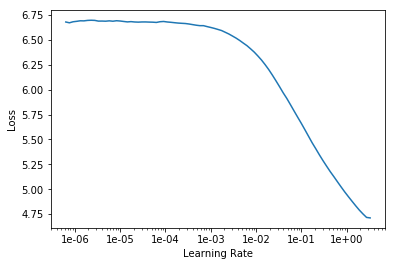

In [123]:
learn.recorder.plot()

In [124]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.934874,4.621894,0.092271,00:05
1,4.780849,3.225818,0.137193,00:05
2,4.170495,3.073754,0.144085,00:05


In [125]:
learn.unfreeze()

In [126]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.093631,2.654351,0.241657,00:07
1,2.870281,2.446944,0.316406,00:07
2,2.660801,2.088234,0.415653,00:07
3,2.467499,2.038250,0.425223,00:07
4,2.305543,1.810131,0.470006,00:07
5,2.174372,1.752905,0.487863,00:07
6,2.065588,1.707525,0.503376,00:07
7,1.976489,1.684211,0.509319,00:07
8,1.909897,1.676770,0.509961,00:07
9,1.861007,1.675682,0.511105,00:07


In [129]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.703973,1.669288,0.510993,00:07
1,1.686460,1.647782,0.520982,00:07
2,1.664503,1.607581,0.530022,00:07
3,1.638346,1.568180,0.542969,00:07
4,1.611604,1.530332,0.553320,00:07
5,1.590198,1.514774,0.558315,00:07
6,1.563289,1.500473,0.561384,00:07
7,1.545529,1.501745,0.564286,00:07
8,1.535200,1.491812,0.563811,00:07
9,1.516340,1.492171,0.564481,00:07


In [130]:
TEXT = "bob"
N_WORDS = 100
N_SENTENCES = 50

In [131]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

bob b e a n   c a f e xxbos   o r i e n t a l   i n d i a n xxbos   p i z z a   l o u n g e xxbos   c a s t y ' s   e x p r e s s xxbos   s h a n a   i n d i a n   t a k e a w a y xxbos   o l i v e n   c h i p p y xxbos   m e m
bob a b o b a b   h o u s e xxbos   p a r k a ' s   b a l t i xxbos   n a s a   w a t i b b e a n   f o o d xxbos   p i z z a   o r o xxbos   m i n g t o   c a f e xxbos   l i t t l e   f i s h   &   c h i p s xxbos   m i r a n
bob b l u e   t a n d o o r i xxbos   a r e d   p i z z a xxbos   f a i l a   p i z z a   &   b e n g a l xxbos   a l   b e l l o p xxbos   s p i c e   o f   i t a l i a n xxbos   m i n n a xxbos   a m a xxbos   s u n b y   h u t xxbos
bob b a b s   &   p i z z a xxbos   t a t h e   a r d i n a xxbos   y o u n g   k e b a b   h o u s e xxbos   j o h   g r e e n xxbos   i n d i a n   r e s t a u r a n t xxbos   r i z z e r i a xxbos   t h e   r a j   a r t h a
bob b l e y   b u r g e r s xxbos   a m b e r   t h a i   k i t c h e n xxbos   

In [132]:
learn.save_encoder('just_eat_enc')

## Classifier with Just Eat data

In [133]:
data = TextClasDataBunch.from_df(path='.', train_df=bal_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab,
                         mark_fields=False, bs=512)

In [134]:
data.show_batch()

text,target
c h a r c o a l g r i l l t u r k i s h r e s t a u r a n t - s o u t h b u r y r o a d,Kebab
t u r k i s h k e b a b & m e d f i s h b a r & f r e s h f r i e d c h i c k e n,Fish & Chips
f l a v a z a u t h e n t i c c a r i b b e a n f o o d & e n g l i s h t a k e a w a y,Caribbean
u n i q u e g r i l l e d m e a t s - h u n g a r i a n r o a s t e d s p e c i a l s,Chicken
a l l n a t i o n s m i n i m a r k e t u k m a m a z a n z i b a r s h e f f i e l d,Caribbean


In [135]:
learn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.3, bptt=50)


In [136]:
learn.load_encoder('just_eat_enc')

In [137]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


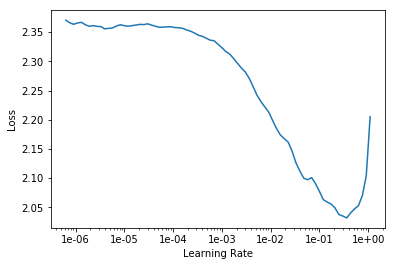

In [138]:
learn.recorder.plot()

In [139]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.143626,2.154588,0.395714,00:02
1,1.909586,1.539345,0.508571,00:02
2,1.754155,1.457844,0.535714,00:01
3,1.659163,1.428405,0.557143,00:02
4,1.587080,1.447023,0.561429,00:02
5,1.536195,1.366514,0.572857,00:02
6,1.482834,1.385458,0.567143,00:02
7,1.439036,1.382292,0.587143,00:01
8,1.411767,1.375690,0.587143,00:02
9,1.373541,1.374474,0.587143,00:01


In [140]:
learn.unfreeze()

In [141]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.253678,1.347303,0.590000,00:04
1,1.251458,1.307804,0.597143,00:04
2,1.196870,1.325150,0.604286,00:04
3,1.157563,1.295711,0.615714,00:04
4,1.108195,1.316959,0.604286,00:04
5,1.048129,1.295223,0.615714,00:04
6,0.997044,1.285663,0.615714,00:04
7,0.951274,1.303934,0.612857,00:04
8,0.901267,1.289843,0.611429,00:04
9,0.866866,1.291577,0.612857,00:04


In [142]:
    def confusion_matrix(self):
        "Confusion matrix as an `np.ndarray`"
        x=torch.arange(0,data.c)
        cm = ((self.pred_class==x[:,None]) & (self.y_true==x[:,None,None])).sum(2)
        return cm.cpu().numpy()

    def plot_confusion_matrix(self, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = self.confusion_matrix()
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, self.data.classes, rotation=45)
        plt.yticks(tick_marks, self.data.classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [143]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

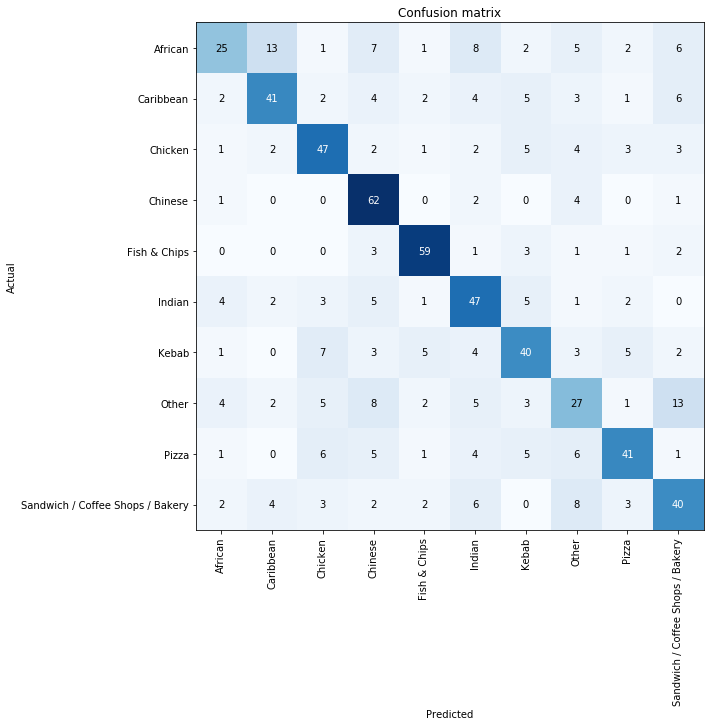

In [144]:
interp.plot_confusion_matrix(figsize=(10,10))

In [87]:
learn.predict("mamoods mirch")

(Category Kebab,
 tensor(6),
 tensor([0.0278, 0.0902, 0.0827, 0.0335, 0.1813, 0.1643, 0.1862, 0.0388, 0.1442,
         0.0511]))

In [73]:
learn.predict("fryer tuck")

(Category Fish & Chips,
 tensor(4),
 tensor([0.0055, 0.0201, 0.0907, 0.1009, 0.5261, 0.0095, 0.0979, 0.0882, 0.0433,
         0.0179]))

In [74]:
learn.predict("pearl palace")

(Category Chinese,
 tensor(3),
 tensor([0.0058, 0.0033, 0.0030, 0.8568, 0.0034, 0.0395, 0.0318, 0.0284, 0.0135,
         0.0145]))

In [76]:
learn.predict("jerk house")

(Category Caribbean,
 tensor(1),
 tensor([6.3075e-03, 9.6294e-01, 4.9210e-03, 8.0615e-03, 1.4554e-03, 3.3974e-03,
         3.4982e-03, 7.4204e-03, 7.7911e-04, 1.2150e-03]))

In [84]:
learn.predict("abra kebabra")

(Category Kebab,
 tensor(6),
 tensor([9.8209e-05, 2.7411e-05, 8.0890e-05, 4.3034e-06, 1.8611e-05, 1.0272e-04,
         9.9698e-01, 2.9468e-05, 2.6527e-03, 3.6931e-06]))

In [83]:
learn.predict("mcdoner")

(Category Fish & Chips,
 tensor(4),
 tensor([0.0709, 0.0430, 0.1342, 0.0502, 0.2228, 0.0313, 0.1281, 0.1339, 0.1233,
         0.0624]))

In [79]:
learn.predict("southern fried rooster")

(Category Chicken,
 tensor(2),
 tensor([0.0057, 0.0097, 0.7755, 0.0151, 0.0187, 0.0047, 0.0882, 0.0409, 0.0228,
         0.0187]))

In [80]:
learn.predict("luigis pizza parlour")

(Category Pizza,
 tensor(8),
 tensor([1.3904e-03, 1.1355e-03, 9.9465e-03, 2.4392e-03, 8.5523e-03, 7.8015e-03,
         5.5586e-02, 3.2298e-03, 9.0967e-01, 2.5205e-04]))

In [81]:
learn.predict("mrs boggins sandwich shop")

(Category Sandwich / Coffee Shops / Bakery,
 tensor(9),
 tensor([5.9428e-04, 1.0694e-02, 2.5535e-03, 1.1006e-03, 4.2349e-03, 1.2717e-03,
         6.6730e-04, 1.1268e-01, 7.4848e-04, 8.6546e-01]))

In [82]:
learn.predict("codfather")

(Category Sandwich / Coffee Shops / Bakery,
 tensor(9),
 tensor([0.0103, 0.0076, 0.0159, 0.0115, 0.1967, 0.0130, 0.0457, 0.1468, 0.0166,
         0.5359]))